In [489]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def drop_suffix(df, suffix):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith(suffix)]
    df.drop(to_drop, axis=1, inplace=True)

In [382]:
#url = 'https://www.opendisdata.nl/download/csv/04_REF_DGN.csv'
url = 'data/04_REF_DGN.csv'
df_ref_dgn = pd.read_csv(url, sep=',', header=0)
df_ref_dgn.head()

,VERSIE,DATUM_BESTAND,PEILDATUM,DIAGNOSE_CD,SPECIALISME_CD,DIAGNOSE_OMSCHRIJVING
0,1.0,2019-03-18,2019-03-01,55,302,Globus / slikklachten
1,1.0,2019-03-18,2019-03-01,330,303,maligne neoplasma maag
2,1.0,2019-03-18,2019-03-01,2103,316,leverfunctiestoornissen
3,1.0,2019-03-18,2019-03-01,107,318,stationaire oesofagus manometrie
4,1.0,2019-03-18,2019-03-01,001,304,Eenvoudig 1 malig consult zonder behandeling <...


In [383]:
#url = 'https://www.opendisdata.nl/download/csv/06_REF_SPC.csv'
url = 'data/06_REF_SPC.csv'
df_ref_spc = pd.read_csv(url, sep=',', header=0)
df_ref_spc.head()

,VERSIE,DATUM_BESTAND,PEILDATUM,SPECIALISME_CD,OMSCHRIJVING
0,1.0,2019-03-18,2019-03-01,601,"Ziekenhuizen, algemene ziekenhuizen"
1,1.0,2019-03-18,2019-03-01,9100,"Verpleegkundigen, niet nader gespecificeerd"
2,1.0,2019-03-18,2019-03-01,533,"Stottertherapie, Hanen-ouderprogramma, Direct ..."
3,1.0,2019-03-18,2019-03-01,403,"Fysiotherapeuten, kinderfysiotherapie"
4,1.0,2019-03-18,2019-03-01,421,"Fysiotherapeuten, fysiotherapie in de geriatri..."


In [384]:
#url = 'https://www.opendisdata.nl/download/diagnose/csv/pat/100/'
url = 'data/Top_100_diagnoses_per_jaar.csv'
df_top100 = pd.read_csv(url, sep=';', header=0, parse_dates=[0])
df_top100.head()

,jaar,nr,specialisme,diagnose,aantal_patienten
0,2012-01-01,1,301,554,185445
1,2012-01-01,2,310,14,144892
2,2012-01-01,3,320,201,140064
3,2012-01-01,4,302,16,131695
4,2012-01-01,5,302,13,128768


In [385]:
df_top100 = pd.merge(df_top100, df_ref_dgn, left_on=['diagnose','specialisme'], right_on=['DIAGNOSE_CD','SPECIALISME_CD'], how='left', suffixes=('','_dgn'))
df_top100.head()

,jaar,nr,specialisme,diagnose,aantal_patienten,VERSIE,DATUM_BESTAND,PEILDATUM,DIAGNOSE_CD,SPECIALISME_CD,DIAGNOSE_OMSCHRIJVING
0,2012-01-01,1,301,554,185445,1.0,2019-03-18,2019-03-01,554,301,Cataract
1,2012-01-01,2,310,14,144892,1.0,2019-03-18,2019-03-01,14,310,Maligne dermatosen
2,2012-01-01,3,320,201,140064,1.0,2019-03-18,2019-03-01,201,320,Thoracale klachten eci
3,2012-01-01,4,302,16,131695,1.0,2019-03-18,2019-03-01,16,302,Perceptieve slechthorendheid
4,2012-01-01,5,302,13,128768,1.0,2019-03-18,2019-03-01,13,302,"OMA, OME, tubadysfunctie"


In [386]:
df_top100 = pd.merge(df_top100, df_ref_spc, left_on='specialisme', right_on='SPECIALISME_CD', how='left', suffixes=('','_spc'))
df_top100.head()

,jaar,nr,specialisme,diagnose,aantal_patienten,VERSIE,DATUM_BESTAND,PEILDATUM,DIAGNOSE_CD,SPECIALISME_CD,DIAGNOSE_OMSCHRIJVING,VERSIE_spc,DATUM_BESTAND_spc,PEILDATUM_spc,SPECIALISME_CD_spc,OMSCHRIJVING
0,2012-01-01,1,301,554,185445,1.0,2019-03-18,2019-03-01,554,301,Cataract,1.0,2019-03-18,2019-03-01,301,"Medisch specialisten, oogheelkunde"
1,2012-01-01,2,310,14,144892,1.0,2019-03-18,2019-03-01,14,310,Maligne dermatosen,1.0,2019-03-18,2019-03-01,310,"Medisch specialisten, dermatologie"
2,2012-01-01,3,320,201,140064,1.0,2019-03-18,2019-03-01,201,320,Thoracale klachten eci,1.0,2019-03-18,2019-03-01,320,"Medisch specialisten, cardiologie"
3,2012-01-01,4,302,16,131695,1.0,2019-03-18,2019-03-01,16,302,Perceptieve slechthorendheid,1.0,2019-03-18,2019-03-01,302,"Medisch specialisten, keel-, neus- en oorheelk..."
4,2012-01-01,5,302,13,128768,1.0,2019-03-18,2019-03-01,13,302,"OMA, OME, tubadysfunctie",1.0,2019-03-18,2019-03-01,302,"Medisch specialisten, keel-, neus- en oorheelk..."


In [387]:
drop_suffix(df_top100, '_dgn')
drop_suffix(df_top100, '_spc')
list_to_drop = ['VERSIE','DATUM_BESTAND','PEILDATUM','DIAGNOSE_CD','SPECIALISME_CD']
df_top100 = df_top100.drop(columns=list_to_drop)
df_top100 = df_top100.set_index('jaar')
#df_top100 = df_top100.sort_values(by='aantal_patienten',ascending=False)
df_top100.head()

,nr,specialisme,diagnose,aantal_patienten,DIAGNOSE_OMSCHRIJVING,OMSCHRIJVING
jaar,,,,,,
2012-01-01,1,301,554,185445,Cataract,"Medisch specialisten, oogheelkunde"
2012-01-01,2,310,14,144892,Maligne dermatosen,"Medisch specialisten, dermatologie"
2012-01-01,3,320,201,140064,Thoracale klachten eci,"Medisch specialisten, cardiologie"
2012-01-01,4,302,16,131695,Perceptieve slechthorendheid,"Medisch specialisten, keel-, neus- en oorheelk..."
2012-01-01,5,302,13,128768,"OMA, OME, tubadysfunctie","Medisch specialisten, keel-, neus- en oorheelk..."


In [388]:
df_beroerte = df_top100.loc[ (df_top100['DIAGNOSE_OMSCHRIJVING'] == 'Onbloedige beroerte') ]
#df_beroerte = df_top100.loc[ (df_top100['specialisme']==330) & (df_top100['diagnose']=='1111') ] #'onbloedige beroerte'
df_beroerte = df_beroerte[:'2018']
df_beroerte

,nr,specialisme,diagnose,aantal_patienten,DIAGNOSE_OMSCHRIJVING,OMSCHRIJVING
jaar,,,,,,
2012-01-01,90,330,1111,36250,Onbloedige beroerte,"Medisch specialisten, neurologie"
2013-01-01,82,330,1111,38161,Onbloedige beroerte,"Medisch specialisten, neurologie"
2014-01-01,77,330,1111,39008,Onbloedige beroerte,"Medisch specialisten, neurologie"
2015-01-01,69,330,1111,38662,Onbloedige beroerte,"Medisch specialisten, neurologie"
2016-01-01,73,330,1111,38506,Onbloedige beroerte,"Medisch specialisten, neurologie"
2017-01-01,75,330,1111,37468,Onbloedige beroerte,"Medisch specialisten, neurologie"
2018-01-01,65,330,1111,22481,Onbloedige beroerte,"Medisch specialisten, neurologie"


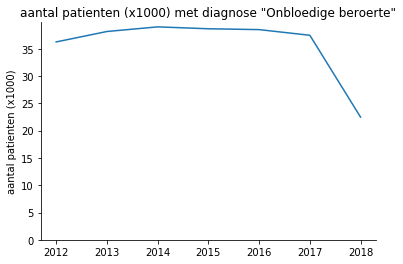

In [389]:
fig, ax = plt.subplots()
_ = plt.plot(df_beroerte.index.values, df_beroerte['aantal_patienten'].values / 1000)
_ = plt.title('aantal patienten (x1000) met diagnose "Onbloedige beroerte"')
_ = plt.ylim(bottom=0)
_ = plt.ylabel('aantal patienten (x1000)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

In [552]:
df_neuro = df_top100.loc[ (df_top100['specialisme']==330) ] # Specialisme: neurologie (330)
df_neuro = df_neuro.loc[:'2018',['aantal_patienten','DIAGNOSE_OMSCHRIJVING']]

df_neuro = pd.pivot(df_neuro, columns='DIAGNOSE_OMSCHRIJVING', values='aantal_patienten')
#df_neuro.dropna(axis='columns', inplace=True)

df_neuro

DIAGNOSE_OMSCHRIJVING,Commotio / contusio cerebri,Epilepsie gegeneraliseerd,Nervus medianus (inclusief CTS),Onbloedige beroerte,Radiculair syndroom / HNP lumbaal-thoracaal
jaar,,,,,
2012-01-01,37467.0,NaN,45301.0,36250.0,55460.0
2013-01-01,40697.0,NaN,45066.0,38161.0,56965.0
2014-01-01,45121.0,NaN,44271.0,39008.0,56475.0
2015-01-01,44171.0,NaN,42944.0,38662.0,53903.0
2016-01-01,40305.0,32035.0,42527.0,38506.0,55775.0
2017-01-01,36378.0,30098.0,40527.0,37468.0,54078.0
2018-01-01,17476.0,NaN,21875.0,22481.0,28309.0


[]

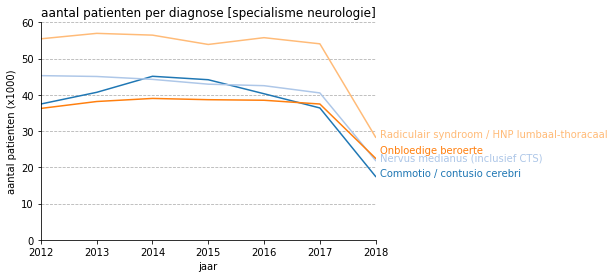

In [551]:
#http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

# These are the "Tableau 20" colors as RGB. 
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 
    
fig, ax = plt.subplots()
#_ = plt.plot(df_neuro / 1000)
_ = plt.xlabel('jaar')
_ = plt.ylabel('aantal patienten (x1000)')
_ = plt.title('aantal patienten per diagnose [specialisme neurologie]')

x_min = df_neuro.index.values[0]
x_max = df_neuro.index.values[-1]
x_min_value = pd.to_datetime(x_min).year
x_max_value = pd.to_datetime(x_max).year
y_min = 0
y_max =  math.ceil((df_neuro.max().max() / 1000) /10) * 10

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
_ = plt.ylim(y_min, y_max)
_ = plt.xlim(x_min, x_max)

x_pos = df_neuro.index.values[-1] + np.timedelta64('30','D')
for key, column in enumerate(df_neuro.columns):
    y_pos = df_neuro.iloc[-1,key] / 1000
    if column == 'Onbloedige beroerte':
        y_pos +=1.5
    _ = plt.plot(df_neuro.index.values, df_neuro[column].values / 1000, color=tableau20[key])
    _ = plt.text(x_pos, y_pos, column, color=tableau20[key])

# Remove the plot frame lines. They are unnecessary chartjunk.    
_ = ax.spines["top"].set_visible(False)    
_ = ax.spines["right"].set_visible(False)    
_ = ax.grid(axis='y', linestyle='--', alpha=0.3, color='black')
plt.plot()